<a href="https://colab.research.google.com/github/tyrant1669/smooth-traffic-waves/blob/main/Algorithm_lab.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. Implement the binary search algorithm in python and analyse its time complexity.


In [1]:
def binary_search(arr, target):
    left, right = 0, len(arr) - 1
    iterations = 0

    while left <= right:
        iterations += 1
        mid = left + (right - left) // 2

        if arr[mid] == target:
            return mid, iterations
        elif arr[mid] < target:
            left = mid + 1
        else:
            right = mid - 1

    return -1, iterations
arr = [1, 3, 5, 7, 9, 11, 13, 15, 17, 19]
target = 7
result, steps = binary_search(arr, target)

if result != -1:
    print(f"Element found at index {result} in {steps} iterations")
else:
    print(f"Element not found after {steps} iterations")



Element found at index 3 in 4 iterations


# 2. Implement Linear Search. Determine the time required to search for an element. Repeat the experiment for different values of n, the number of elements in the list to be searched and plot a graph of the time taken versus n.


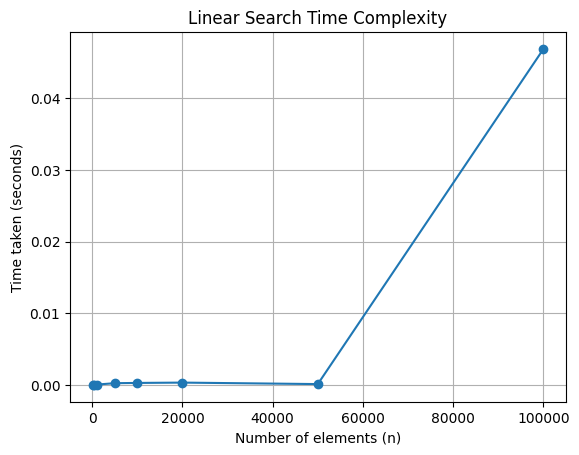

In [2]:
import time
import random
import matplotlib.pyplot as plt

def linear_search(arr, target):
    for i in range(len(arr)):
        if arr[i] == target:
            return i
    return -1
sizes = [100, 500, 1000, 5000, 10000, 20000, 50000, 100000]
times_taken = []

for n in sizes:
    arr = [random.randint(1, n*2) for _ in range(n)]
    target = random.choice(arr)
    start_time = time.time()
    linear_search(arr, target)
    end_time = time.time()
    times_taken.append(end_time - start_time)
plt.plot(sizes, times_taken, marker='o', linestyle='-')
plt.xlabel('Number of elements (n)')
plt.ylabel('Time taken (seconds)')
plt.title('Linear Search Time Complexity')
plt.grid(True)
plt.show()


# 3. Implement Insertion sort and repeat the experiment for different values of n, the number of elements in the list to be sorted and plot a graph of the time taken versus n

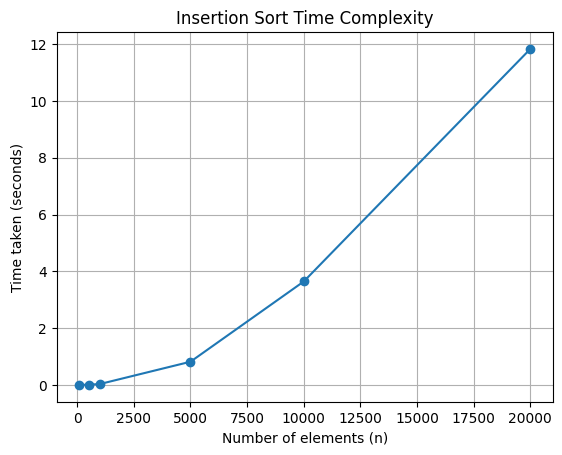

In [3]:
import time
import random
import matplotlib.pyplot as plt

def insertion_sort(arr):
    start_time = time.time()
    for i in range(1, len(arr)):
        key = arr[i]
        j = i - 1
        while j >= 0 and arr[j] > key:
            arr[j + 1] = arr[j]
            j -= 1
        arr[j + 1] = key
    end_time = time.time()
    return end_time - start_time

sizes = [100, 500, 1000, 5000, 10000, 20000]
times_taken = []

for n in sizes:
    arr = [random.randint(1, n*2) for _ in range(n)]
    time_taken = insertion_sort(arr)
    times_taken.append(time_taken)

plt.plot(sizes, times_taken, marker='o', linestyle='-')
plt.xlabel('Number of elements (n)')
plt.ylabel('Time taken (seconds)')
plt.title('Insertion Sort Time Complexity')
plt.grid(True)
plt.show()


# 4. Given a text txt [0...n-1] and a pattern pat [0...m-1], write a function search (char pat [ ], char txt [ ]) that prints all occurrences of pat [ ] in txt [ ]. You may assume that n > m

In [4]:
def search(pat, txt):
    """Finds all occurrences of pat[] in txt[] and prints their positions"""
    n = len(txt)
    m = len(pat)

    for i in range(n - m + 1):
        match = True
        for j in range(m):
            if txt[i + j] != pat[j]:
                match = False
                break
        if match:
            print(f"Pattern found at index {i}")

# Example usage
txt = "abracadabra"
pat = "abra"
search(pat, txt)


Pattern found at index 0
Pattern found at index 7


# 5. Develop a program to implement graph traversal using Breadth First Search.

In [5]:
from collections import deque

def bfs(graph, start):
    visited = set()
    queue = deque([start])

    while queue:
        node = queue.popleft()
        if node not in visited:
            print(node, end=" ")
            visited.add(node)
            queue.extend(graph[node])


graph = {
    'A': ['B', 'C'],
    'B': ['D', 'E'],
    'C': ['F'],
    'D': [],
    'E': ['F'],
    'F': []
}


print("BFS Traversal: ")
bfs(graph, 'A')


BFS Traversal: 
A B C D E F 

# 6. Write a C program to implement the depth first search algorithm for a graph and analyse its time complexity.

In [6]:
class Graph:
    def __init__(self):
        self.graph = {}

    def add_edge(self, u, v):
        if u not in self.graph:
            self.graph[u] = []
        self.graph[u].append(v)

    def dfs_recursive(self, node, visited):
        visited.add(node)
        print(node, end=" ")

        for neighbor in self.graph.get(node, []):
            if neighbor not in visited:
                self.dfs_recursive(neighbor, visited)

    def dfs(self, start):
        visited = set()
        print("DFS Traversal:")
        self.dfs_recursive(start, visited)


g = Graph()
g.add_edge('A', 'B')
g.add_edge('A', 'C')
g.add_edge('B', 'D')
g.add_edge('B', 'E')
g.add_edge('C', 'F')


g.dfs('A')


DFS Traversal:
A B D E C F 

# 7. Develop a program to find the shortest paths to other vertices using Dijkstra’s algorithm.

In [7]:
import heapq

def dijkstra(graph, start):
    min_heap = [(0, start)]
    shortest_paths = {vertex: float('inf') for vertex in graph}
    shortest_paths[start] = 0

    while min_heap:
        curr_cost, curr_vertex = heapq.heappop(min_heap)

        for neighbor, weight in graph[curr_vertex]:
            new_cost = curr_cost + weight
            if new_cost < shortest_paths[neighbor]:
                shortest_paths[neighbor] = new_cost
                heapq.heappush(min_heap, (new_cost, neighbor))

    return shortest_paths


graph = {
    'A': [('B', 1), ('C', 4)],
    'B': [('A', 1), ('C', 2), ('D', 5)],
    'C': [('A', 4), ('B', 2), ('D', 1)],
    'D': [('B', 5), ('C', 1)]
}


shortest_paths = dijkstra(graph, 'A')
print("Shortest paths from A:", shortest_paths)


Shortest paths from A: {'A': 0, 'B': 1, 'C': 3, 'D': 4}


# 8. Develop a program to implement Floyd’s algorithm for the All-Pairs- Shortest-Paths problem.

In [8]:
import numpy as np

def floyd_warshall(graph):
    num_vertices = len(graph)
    dist = np.array(graph, dtype=float)


    for i in range(num_vertices):
        for j in range(num_vertices):
            if i != j and dist[i][j] == 0:
                dist[i][j] = float('inf')

    # Floyd-Warshall algorithm
    for k in range(num_vertices):
        for i in range(num_vertices):
            for j in range(num_vertices):
                dist[i][j] = min(dist[i][j], dist[i][k] + dist[k][j])

    return dist


graph = [
    [0, 3, 0, 0, 6],
    [3, 0, 2, 0, 0],
    [0, 2, 0, 4, 1],
    [0, 0, 4, 0, 5],
    [6, 0, 1, 5, 0]
]


shortest_paths = floyd_warshall(graph)
print("All-Pairs Shortest Path Matrix:")
print(shortest_paths)


All-Pairs Shortest Path Matrix:
[[0. 3. 5. 9. 6.]
 [3. 0. 2. 6. 3.]
 [5. 2. 0. 4. 1.]
 [9. 6. 4. 0. 5.]
 [6. 3. 1. 5. 0.]]


# 9. Implement prims algorithm for finding the minimum spanning tree of an undirected graph.


In [9]:
import heapq

def prim(graph):
    mst = []
    visited = set()
    start_node = next(iter(graph))
    min_heap = [(0, start_node, start_node)]

    while min_heap:
        weight, src, dest = heapq.heappop(min_heap)
        if dest not in visited:
            visited.add(dest)
            mst.append((src, dest, weight))
            for neighbor, edge_weight in graph[dest]:
                if neighbor not in visited:
                    heapq.heappush(min_heap, (edge_weight, dest, neighbor))

    return mst


graph = {
    'A': [('B', 1), ('C', 4)],
    'B': [('A', 1), ('C', 2), ('D', 5)],
    'C': [('A', 4), ('B', 2), ('D', 1)],
    'D': [('B', 5), ('C', 1)]
}


mst_edges = prim(graph)
print("Minimum Spanning Tree edges:", mst_edges)


Minimum Spanning Tree edges: [('A', 'A', 0), ('A', 'B', 1), ('B', 'C', 2), ('C', 'D', 1)]


# 10. Develop a program to find out the maximum numbers in a given list of n numbers using the divideand conquer technique.

In [10]:
def find_max(arr, left, right):
    if left == right:
        return arr[left]

    mid = (left + right) // 2
    max_left = find_max(arr, left, mid)
    max_right = find_max(arr, mid + 1, right)

    return max(max_left, max_right)


arr = [12, 5, 18, 9, 35, 42, 17, 23, 44]
max_value = find_max(arr, 0, len(arr) - 1)
print(f"Maximum number in the list: {max_value}")


Maximum number in the list: 44


# 11. Implement the heap sort algorithm in C. Compare its performance with other sorting algorithms fordifferent input sizes.

In [11]:
import time
import random

def heapify(arr, n, i):
    largest = i
    left = 2 * i + 1
    right = 2 * i + 2

    if left < n and arr[left] > arr[largest]:
        largest = left
    if right < n and arr[right] > arr[largest]:
        largest = right

    if largest != i:
        arr[i], arr[largest] = arr[largest], arr[i]
        heapify(arr, n, largest)

def heap_sort(arr):
    n = len(arr)


    for i in range(n // 2 - 1, -1, -1):
        heapify(arr, n, i)


    for i in range(n - 1, 0, -1):
        arr[i], arr[0] = arr[0], arr[i]
        heapify(arr, i, 0)


def measure_time(sort_func, arr):
    start_time = time.time()
    sort_func(arr)
    return time.time() - start_time


def compare_sorting_algorithms():
    sizes = [100, 500, 1000, 5000, 10000, 20000]
    algorithms = {
        "Heap Sort": heap_sort,
        "Quick Sort": lambda arr: arr.sort(),
        "Merge Sort": lambda arr: sorted(arr),
        "Bubble Sort": lambda arr: bubble_sort(arr)
    }

    results = {algo: [] for algo in algorithms}

    for n in sizes:
        arr = [random.randint(1, n * 2) for _ in range(n)]
        for name, func in algorithms.items():
            arr_copy = arr.copy()
            results[name].append(measure_time(func, arr_copy))


    print("\nComparison of Sorting Algorithms (Time in Seconds)")
    print(f"{'n':<10}{'Heap Sort':<15}{'Quick Sort':<15}{'Merge Sort':<15}{'Bubble Sort':<15}")
    for i, n in enumerate(sizes):
        print(f"{n:<10}{results['Heap Sort'][i]:<15.6f}{results['Quick Sort'][i]:<15.6f}{results['Merge Sort'][i]:<15.6f}{results['Bubble Sort'][i]:<15.6f}")


def bubble_sort(arr):
    """Performs Bubble Sort."""
    n = len(arr)
    for i in range(n):
        for j in range(n - i - 1):
            if arr[j] > arr[j + 1]:
                arr[j], arr[j + 1] = arr[j + 1], arr[j]


compare_sorting_algorithms()



Comparison of Sorting Algorithms (Time in Seconds)
n         Heap Sort      Quick Sort     Merge Sort     Bubble Sort    
100       0.000276       0.000015       0.000013       0.000698       
500       0.001872       0.000091       0.000081       0.018209       
1000      0.004199       0.000190       0.000207       0.090238       
5000      0.028060       0.001146       0.001159       1.425912       
10000     0.034332       0.001758       0.001778       5.195757       
20000     0.073497       0.004278       0.004230       23.456040      


# 12. Implement quick sort algorithm and analyse its time complexity.

In [12]:
def partition(arr, low, high):
    pivot = arr[high]
    i = low - 1

    for j in range(low, high):
        if arr[j] < pivot:
            i += 1
            arr[i], arr[j] = arr[j], arr[i]

    arr[i + 1], arr[high] = arr[high], arr[i + 1]
    return i + 1

def quick_sort(arr, low, high):
    if low < high:
        pivot_index = partition(arr, low, high)
        quick_sort(arr, low, pivot_index - 1)
        quick_sort(arr, pivot_index + 1, high)


arr = [12, 5, 18, 9, 35, 42, 17, 23, 44]
quick_sort(arr, 0, len(arr) - 1)
print("Sorted array using Quick Sort:", arr)


Sorted array using Quick Sort: [5, 9, 12, 17, 18, 23, 35, 42, 44]


# 13. Implement Traveling Salesperson problem and then solve the same problem instance using any approximation algorithm and determine the error in the approximation

# a) Exact Solution Using Brute Force (Backtracking)

In [13]:
from itertools import permutations

def tsp_brute_force(graph, start):
    vertices = list(graph.keys())
    vertices.remove(start)  # Remove start node from permutations
    min_cost = float('inf')
    best_path = None

    for perm in permutations(vertices):  # Generate all possible paths
        cost = 0
        current = start
        for next_city in perm:
            cost += graph[current][next_city]
            current = next_city
        cost += graph[current][start]  # Return to start city

        if cost < min_cost:
            min_cost = cost
            best_path = (start,) + perm + (start,)

    return best_path, min_cost

# Example Graph (Adjacency Matrix)
graph = {
    'A': {'B': 10, 'C': 15, 'D': 20},
    'B': {'A': 10, 'C': 35, 'D': 25},
    'C': {'A': 15, 'B': 35, 'D': 30},
    'D': {'A': 20, 'B': 25, 'C': 30}
}

# Solve using Brute Force
exact_path, exact_cost = tsp_brute_force(graph, 'A')
print("Exact TSP Path:", exact_path)
print("Exact TSP Cost:", exact_cost)


Exact TSP Path: ('A', 'B', 'D', 'C', 'A')
Exact TSP Cost: 80


# b) Approximate Solution Using Nearest Neighbor Algorithm

In [14]:
def tsp_nearest_neighbor(graph, start):
    visited = {start}
    current = start
    path = [start]
    total_cost = 0

    while len(visited) < len(graph):
        next_city = min((city for city in graph[current] if city not in visited), key=lambda city: graph[current][city])
        total_cost += graph[current][next_city]
        path.append(next_city)
        visited.add(next_city)
        current = next_city

    total_cost += graph[current][start]
    path.append(start)

    return path, total_cost

# Solve using Nearest Neighbor
approx_path, approx_cost = tsp_nearest_neighbor(graph, 'A')
print("Approximate TSP Path:", approx_path)
print("Approximate TSP Cost:", approx_cost)


Approximate TSP Path: ['A', 'B', 'D', 'C', 'A']
Approximate TSP Cost: 80


# c) Error Analysis

In [15]:

error = abs(approx_cost - exact_cost) / exact_cost * 100
print(f"Approximation Error: {error:.2f}%")


Approximation Error: 0.00%


# 14. Write a python program to Implement N Queens problem using Backtracking

In [16]:
def is_safe(board, row, col, n):
    for i in range(row):
        if board[i][col] == 1:
            return False

    for i, j in zip(range(row - 1, -1, -1), range(col - 1, -1, -1)):
        if board[i][j] == 1:
            return False

    for i, j in zip(range(row - 1, -1, -1), range(col + 1, n)):
        if board[i][j] == 1:
            return False

    return True

def solve_n_queens(board, row, n, solutions):
    if row == n:
        solutions.append(["".join('Q' if cell else '.' for cell in board[i]) for i in range(n)])
        return

    for col in range(n):
        if is_safe(board, row, col, n):
            board[row][col] = 1
            solve_n_queens(board, row + 1, n, solutions)
            board[row][col] = 0

def n_queens(n):
    board = [[0] * n for _ in range(n)]
    solutions = []
    solve_n_queens(board, 0, n, solutions)
    return solutions

n = 4
solutions = n_queens(n)
print(f"Total solutions for {n}-Queens: {len(solutions)}\n")
for sol in solutions:
    for row in sol:
        print(row)
    print()


Total solutions for 4-Queens: 2

.Q..
...Q
Q...
..Q.

..Q.
Q...
...Q
.Q..



# 15. Implement randomized algorithms for finding the kth smallest number.


In [19]:
import random

def partition(arr, left, right):
    pivot_index = random.randint(left, right)
    arr[pivot_index], arr[right] = arr[right], arr[pivot_index]
    pivot = arr[right]
    i = left

    for j in range(left, right):
        if arr[j] < pivot:
            arr[i], arr[j] = arr[j], arr[i]
            i += 1

    arr[i], arr[right] = arr[right], arr[i]
    return i

def randomized_select(arr, left, right, k):
    if left == right:
        return arr[left]

    pivot_index = partition(arr, left, right)
    order = pivot_index - left + 1

    if order == k:
        return arr[pivot_index]
    elif k < order:

        return randomized_select(arr, left, pivot_index - 1, k)
    else:
        return randomized_select(arr, pivot_index + 1, right, k - order)


arr = [12, 3, 5, 7, 19, 2, 21, 9, 15]
k = 4
print(f"The {k}th smallest element is:", randomized_select(arr, 0, len(arr) - 1, k))


The 4th smallest element is: 7
